# UMAP Visualization for Medical Cases

This notebook generates 2D UMAP projections from high-dimensional embeddings for interactive visualization.

**Goal**: Reduce text/image embeddings to 2D coordinates for visual exploration of case similarities.

**Outputs**:
- `umap_coordinates_text.json` - 2D positions from BERT embeddings
- `umap_coordinates_image.json` - 2D positions from ResNet embeddings
- `umap_coordinates_hybrid.json` - 2D positions from combined embeddings

In [2]:
import numpy as np
import json
from pathlib import Path
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Setup Paths

In [13]:
# Paths
BASE_DIR = Path.cwd().parent
FEATURES_DIR = BASE_DIR / 'data' / 'features'
PROCESSED_DIR = BASE_DIR / 'data' / 'processed'

# Input files
TEXT_EMBEDDINGS = FEATURES_DIR / 'text_embeddings_bert.npy'
IMAGE_EMBEDDINGS = FEATURES_DIR / 'image_embeddings_resnet50.npy'
CASE_IDS = FEATURES_DIR / 'case_ids.json'
CASES_DATA = PROCESSED_DIR / 'cases_cleaned.json'  # Changed to use cleaned data with metadata

# Output files
OUTPUT_TEXT = FEATURES_DIR / 'umap_coordinates_text.json'
OUTPUT_IMAGE = FEATURES_DIR / 'umap_coordinates_image.json'
OUTPUT_HYBRID = FEATURES_DIR / 'umap_coordinates_hybrid.json'

print(f"Features directory: {FEATURES_DIR}")
print(f"Text embeddings: {TEXT_EMBEDDINGS.exists()}")
print(f"Image embeddings: {IMAGE_EMBEDDINGS.exists()}")
print(f"Case IDs: {CASE_IDS.exists()}")
print(f"Cases data: {CASES_DATA.exists()}")

Features directory: /home/yousef/code/school/4DT911-project/data/features
Text embeddings: True
Image embeddings: True
Case IDs: True
Cases data: True


## 2. Load Data

In [14]:
# Load embeddings
text_embeddings = np.load(TEXT_EMBEDDINGS)
image_embeddings = np.load(IMAGE_EMBEDDINGS)

# Load case IDs
with open(CASE_IDS, 'r') as f:
    case_ids = json.load(f)

# Load case metadata
with open(CASES_DATA, 'r') as f:
    cases_data = json.load(f)

# Create case lookup dictionary
cases_dict = {case['id']: case for case in cases_data}

print(f"Loaded {len(text_embeddings)} text embeddings of shape {text_embeddings.shape}")
print(f"Loaded {len(image_embeddings)} image embeddings of shape {image_embeddings.shape}")
print(f"Loaded {len(case_ids)} case IDs")
print(f"Loaded {len(cases_data)} cases with metadata")

Loaded 7404 text embeddings of shape (7404, 384)
Loaded 7404 image embeddings of shape (7404, 2048)
Loaded 7404 case IDs
Loaded 7432 cases with metadata


## 3. Generate UMAP Coordinates

We'll create three projections:
1. **Text-based**: From BERT embeddings (semantic similarity)
2. **Image-based**: From ResNet embeddings (visual similarity)
3. **Hybrid**: Concatenated text + image features

In [5]:
# UMAP parameters
umap_params = {
    'n_neighbors': 15,
    'min_dist': 0.1,
    'metric': 'cosine',
    'random_state': 42,
    'n_components': 2
}

print("UMAP parameters:")
for key, val in umap_params.items():
    print(f"  {key}: {val}")

UMAP parameters:
  n_neighbors: 15
  min_dist: 0.1
  metric: cosine
  random_state: 42
  n_components: 2


### 3.1 Text-based UMAP

In [6]:
print("Running UMAP on text embeddings...")
reducer_text = umap.UMAP(**umap_params)
coords_text = reducer_text.fit_transform(text_embeddings)

print(f"Generated {len(coords_text)} 2D coordinates")
print(f"X range: [{coords_text[:, 0].min():.2f}, {coords_text[:, 0].max():.2f}]")
print(f"Y range: [{coords_text[:, 1].min():.2f}, {coords_text[:, 1].max():.2f}]")

Running UMAP on text embeddings...


/home/yousef/code/school/4DT911-project/Ml-Notebook/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Generated 7404 2D coordinates
X range: [-11.32, 25.43]
Y range: [-12.29, 20.69]


### 3.2 Image-based UMAP

In [7]:
print("Running UMAP on image embeddings...")
reducer_image = umap.UMAP(**umap_params)
coords_image = reducer_image.fit_transform(image_embeddings)

print(f"Generated {len(coords_image)} 2D coordinates")
print(f"X range: [{coords_image[:, 0].min():.2f}, {coords_image[:, 0].max():.2f}]")
print(f"Y range: [{coords_image[:, 1].min():.2f}, {coords_image[:, 1].max():.2f}]")

Running UMAP on image embeddings...


/home/yousef/code/school/4DT911-project/Ml-Notebook/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Generated 7404 2D coordinates
X range: [-3.03, 20.57]
Y range: [-9.61, 12.43]


### 3.3 Hybrid UMAP (Combined Text + Image)

In [8]:
# Normalize embeddings before concatenation
scaler_text = StandardScaler()
scaler_image = StandardScaler()

text_normalized = scaler_text.fit_transform(text_embeddings)
image_normalized = scaler_image.fit_transform(image_embeddings)

# Concatenate
hybrid_embeddings = np.hstack([text_normalized, image_normalized])

print(f"Hybrid embeddings shape: {hybrid_embeddings.shape}")

print("Running UMAP on hybrid embeddings...")
reducer_hybrid = umap.UMAP(**umap_params)
coords_hybrid = reducer_hybrid.fit_transform(hybrid_embeddings)

print(f"Generated {len(coords_hybrid)} 2D coordinates")
print(f"X range: [{coords_hybrid[:, 0].min():.2f}, {coords_hybrid[:, 0].max():.2f}]")
print(f"Y range: [{coords_hybrid[:, 1].min():.2f}, {coords_hybrid[:, 1].max():.2f}]")

Hybrid embeddings shape: (7404, 2432)
Running UMAP on hybrid embeddings...


/home/yousef/code/school/4DT911-project/Ml-Notebook/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Generated 7404 2D coordinates
X range: [-6.00, 16.39]
Y range: [-6.47, 27.57]


## 4. Prepare Data for Frontend

In [15]:
def prepare_coordinates(coords, case_ids, cases_dict, method_name):
    """
    Prepare UMAP coordinates with metadata for frontend visualization.
    """
    data = []
    
    for i, case_id in enumerate(case_ids):
        case = cases_dict.get(case_id, {})
        
        # Extract modalities and regions (handle both list and string formats)
        modalities = case.get('modalities', [])
        regions = case.get('regions', [])
        
        # Convert to list if string
        if isinstance(modalities, str):
            modalities = [modalities] if modalities else []
        if isinstance(regions, str):
            regions = [regions] if regions else []
        
        # Get primary modality and region
        primary_modality = modalities[0] if modalities and len(modalities) > 0 else 'Unknown'
        primary_region = regions[0] if regions and len(regions) > 0 else 'Unknown'
        
        # Get patient info
        patient_age = case.get('patient_age')
        gender = case.get('gender', 'Unknown')
        if not gender or gender == '':
            gender = 'Unknown'
        
        data.append({
            'id': case_id,
            'x': float(coords[i, 0]),
            'y': float(coords[i, 1]),
            'diagnosis': case.get('diagnosis', 'Unknown')[:60],  # Truncate for display
            'modality': primary_modality,
            'region': primary_region,
            'imageCount': case.get('imageCount', 0),
            'age': patient_age,
            'gender': gender
        })
    
    return {
        'method': method_name,
        'total_cases': len(data),
        'coordinates': data
    }

# Prepare all three datasets
umap_text_data = prepare_coordinates(coords_text, case_ids, cases_dict, 'text')
umap_image_data = prepare_coordinates(coords_image, case_ids, cases_dict, 'image')
umap_hybrid_data = prepare_coordinates(coords_hybrid, case_ids, cases_dict, 'hybrid')

print(f"Prepared {len(umap_text_data['coordinates'])} text coordinates")
print(f"Prepared {len(umap_image_data['coordinates'])} image coordinates")
print(f"Prepared {len(umap_hybrid_data['coordinates'])} hybrid coordinates")

# Show unique values for coloring
all_modalities = set()
all_regions = set()
all_genders = set()

for coord in umap_hybrid_data['coordinates']:
    all_modalities.add(coord['modality'])
    all_regions.add(coord['region'])
    all_genders.add(coord['gender'])

print(f"\n📊 Unique values for coloring:")
print(f"Modalities ({len(all_modalities)}): {sorted(all_modalities)[:10]}...")
print(f"Regions ({len(all_regions)}): {sorted(all_regions)[:10]}...")
print(f"Genders ({len(all_genders)}): {sorted(all_genders)}")

Prepared 7404 text coordinates
Prepared 7404 image coordinates
Prepared 7404 hybrid coordinates

📊 Unique values for coloring:
Modalities (10): ['Angiogram', 'Bone Scan', 'CT', 'Fluoroscopy', 'MRI', 'Mammogram', 'PET/Nuclear', 'Ultrasound', 'Unknown', 'X-ray']...
Regions (35): ['Abdomen', 'Ankle/Foot', 'Aorta', 'Arm/Humerus', 'Bladder', 'Bowel/Colon', 'Brain/Head', 'Breast', 'Chest', 'Elbow']...
Genders (3): ['Female', 'Male', 'Unknown']


## 5. Save Coordinates

In [16]:
# Save text coordinates
with open(OUTPUT_TEXT, 'w') as f:
    json.dump(umap_text_data, f, indent=2)
print(f"✅ Saved text UMAP coordinates to {OUTPUT_TEXT}")

# Save image coordinates
with open(OUTPUT_IMAGE, 'w') as f:
    json.dump(umap_image_data, f, indent=2)
print(f"✅ Saved image UMAP coordinates to {OUTPUT_IMAGE}")

# Save hybrid coordinates
with open(OUTPUT_HYBRID, 'w') as f:
    json.dump(umap_hybrid_data, f, indent=2)
print(f"✅ Saved hybrid UMAP coordinates to {OUTPUT_HYBRID}")

✅ Saved text UMAP coordinates to /home/yousef/code/school/4DT911-project/data/features/umap_coordinates_text.json
✅ Saved image UMAP coordinates to /home/yousef/code/school/4DT911-project/data/features/umap_coordinates_image.json
✅ Saved hybrid UMAP coordinates to /home/yousef/code/school/4DT911-project/data/features/umap_coordinates_hybrid.json


## 6. Visualization Preview

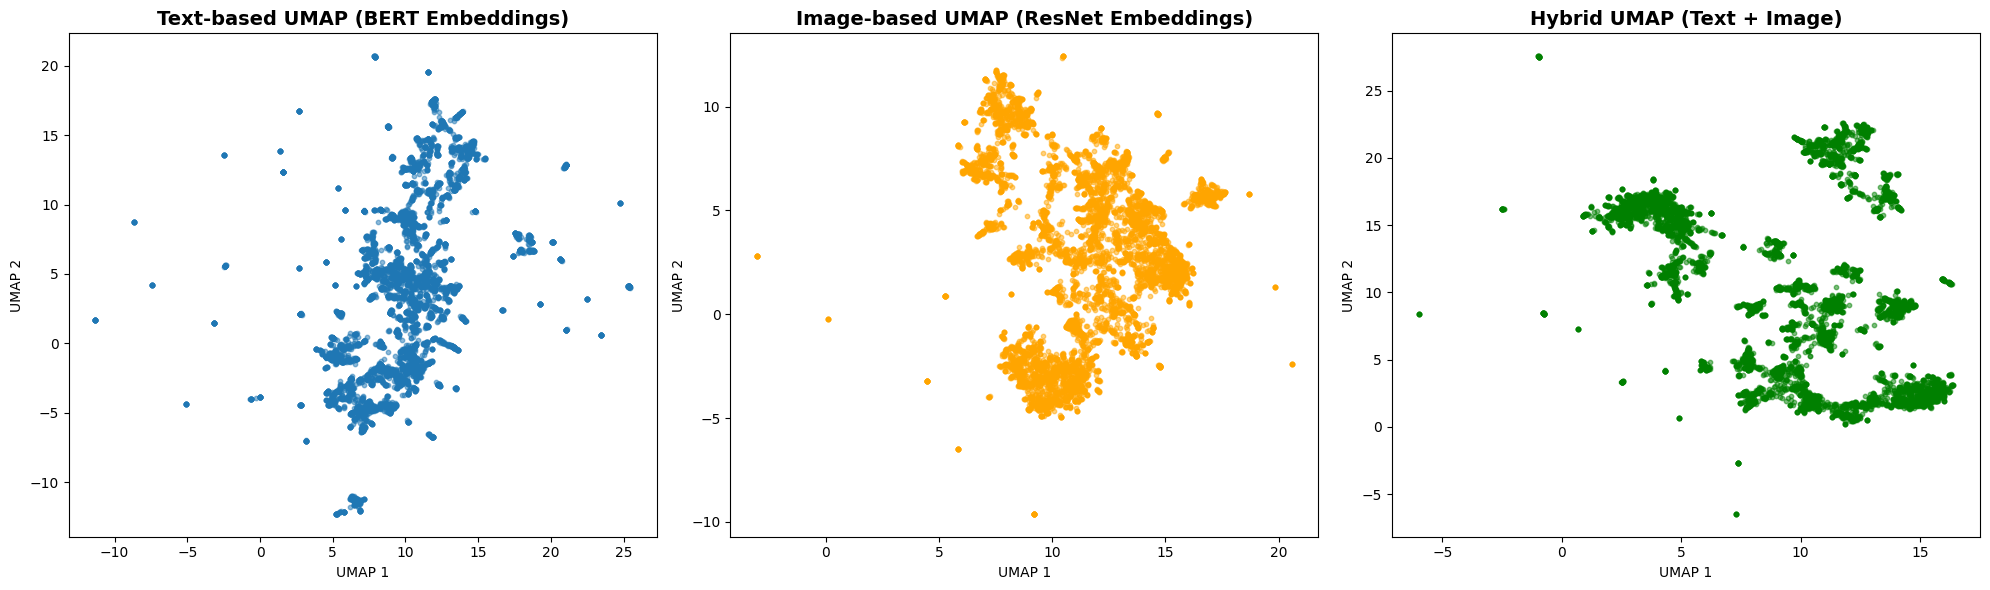

✅ Visualization saved!


In [11]:
# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Text UMAP
axes[0].scatter(coords_text[:, 0], coords_text[:, 1], alpha=0.5, s=10)
axes[0].set_title('Text-based UMAP (BERT Embeddings)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')

# Image UMAP
axes[1].scatter(coords_image[:, 0], coords_image[:, 1], alpha=0.5, s=10, color='orange')
axes[1].set_title('Image-based UMAP (ResNet Embeddings)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')

# Hybrid UMAP
axes[2].scatter(coords_hybrid[:, 0], coords_hybrid[:, 1], alpha=0.5, s=10, color='green')
axes[2].set_title('Hybrid UMAP (Text + Image)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig(FEATURES_DIR / 'umap_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved!")

## 7. Statistics & Summary

In [12]:
print("="*60)
print("UMAP GENERATION COMPLETE")
print("="*60)
print(f"\nTotal cases processed: {len(case_ids)}")
print(f"\nOutput files:")
print(f"  1. {OUTPUT_TEXT.name} ({OUTPUT_TEXT.stat().st_size / 1024:.1f} KB)")
print(f"  2. {OUTPUT_IMAGE.name} ({OUTPUT_IMAGE.stat().st_size / 1024:.1f} KB)")
print(f"  3. {OUTPUT_HYBRID.name} ({OUTPUT_HYBRID.stat().st_size / 1024:.1f} KB)")
print(f"\nNext steps:")
print("  • Add backend endpoint: /api/umap/coordinates")
print("  • Create interactive scatter plot in frontend")
print("  • Add to Cases page for visual exploration")
print("\n✅ Ready for frontend integration!")

UMAP GENERATION COMPLETE

Total cases processed: 7404

Output files:
  1. umap_coordinates_text.json (2038.5 KB)
  2. umap_coordinates_image.json (2038.0 KB)
  3. umap_coordinates_hybrid.json (2036.7 KB)

Next steps:
  • Add backend endpoint: /api/umap/coordinates
  • Create interactive scatter plot in frontend
  • Add to Cases page for visual exploration

✅ Ready for frontend integration!
